In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

In [0]:
pd.DataFrame(cluster.cluster_centers_,
             columns=df.columns)

In [7]:
df["ans"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    print("測試K:", k)
    test = KMeans(n_clusters=k)
    test.fit(iris["data"])
    score = silhouette_score(iris["data"], test.labels_)
    print("親疏程度分數(0:worst, 1:best):", score)

測試K: 2
親疏程度分數(0:worst, 1:best): 0.681046169211746
測試K: 3
親疏程度分數(0:worst, 1:best): 0.5528190123564091
測試K: 4
親疏程度分數(0:worst, 1:best): 0.49745518901737446
測試K: 5
親疏程度分數(0:worst, 1:best): 0.49123997967644706
測試K: 6
親疏程度分數(0:worst, 1:best): 0.3664804028900824
測試K: 7
親疏程度分數(0:worst, 1:best): 0.3542978877198838
測試K: 8
親疏程度分數(0:worst, 1:best): 0.3387447445910213
測試K: 9
親疏程度分數(0:worst, 1:best): 0.3227092557692895
測試K: 10
親疏程度分數(0:worst, 1:best): 0.32367373453308557


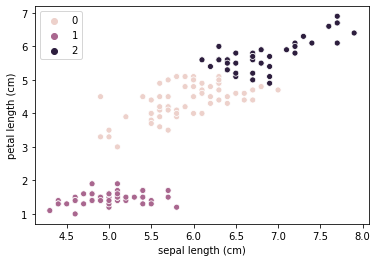

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
xname, yname = df.columns[0], df.columns[2]
sns.scatterplot(df[xname],
                df[yname],
                hue=cluster.labels_)